# Dynamical and Topological Relationships

## Initialize Environment

In [1]:
try:
    %load_ext autoreload
    %autoreload 2
    
except:
    print 'NOT IPYTHON'

from __future__ import division
from IPython.display import display

import os
import sys
import glob
import json

import numpy as np
import pandas as pd
import scipy.stats as stats
import h5py

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import rcParams
import fig_plotting
rcParams = fig_plotting.update_rcparams(rcParams)

os.chdir('../')
import Codebase
os.chdir('./Analysis Notebooks/')

path_CoreData = '/Users/akhambhati/Remotes/hoth_research/CoreData/fMRI_multiband-mmattar/restdata'
path_PeriphData = '/Users/akhambhati/Remotes/hoth_research/PeriphData/ds-NMF_Subnetworks'
path_ModData = path_PeriphData + '/e02-DynFuncModule'
path_SubData = path_PeriphData + '/e03-DynFuncSubgraph'
path_ExpData = path_PeriphData + '/e04-CmpModuleSubgraph'

for path in [path_CoreData, path_PeriphData, path_ModData, path_SubData, path_ExpData]:
    if not os.path.exists(path):
        print('Path: {}, does not exist'.format(path))
        os.makedirs(path)

/Users/akhambhati/Developer/miniconda2/envs/cb-nmfsubnet/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Generate List of Data

In [2]:
subj_mod_ids = np.unique([full_subj_path.split('/')[-1].split('.')[0]
                          for full_subj_path in glob.iglob('{}/*.consensus_module.npz'.format(path_ModData))])
subj_sub_ids = np.unique([full_subj_path.split('/')[-1].split('.')[0]
                          for full_subj_path in glob.iglob('{}/*.consensus_subgraph.npz'.format(path_SubData))])
subj_cfg_ids = np.unique([full_subj_path.split('/')[-1].split('.')[0]
                          for full_subj_path in glob.iglob('{}/*.cfg_matr.npz'.format(path_SubData))])

if not len(np.intersect1d(subj_mod_ids, subj_sub_ids)) == len(subj_mod_ids):
    raise Exception('Subject files mismatched')
if not len(np.intersect1d(subj_mod_ids, subj_cfg_ids)) == len(subj_mod_ids):
    raise Exception('Subject files mismatched')
    
subj_dict = {}
for subj in subj_mod_ids:
    subj_dict[subj] = {'module_path': '{}/{}.consensus_module.npz'.format(path_ModData, subj),
                       'subgraph_path': '{}/{}.consensus_subgraph.npz'.format(path_SubData, subj),
                       'cfg_path': '{}/{}.cfg_matr.npz'.format(path_SubData, subj)}

## Modules vs Subgraphs

 -- Processing: A010615C


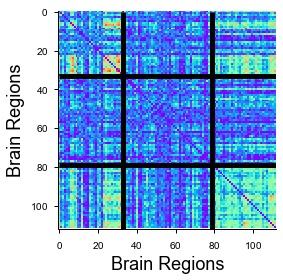

In [4]:
%matplotlib inline

n_subj = len(subj_dict.keys())
for subj_i, subj in enumerate(['A010615C']): #enumerate(subj_dict.iterkeys()):
    print(" -- Processing: {}".format(subj))
    
    data_cfg = np.load(subj_dict[subj]['cfg_path'], mmap_mode='r')
    data_sub = np.load(subj_dict[subj]['subgraph_path'], mmap_mode='r')
    data_mod = np.load(subj_dict[subj]['module_path'], mmap_mode='r')
    
    
    module_assign = data_mod['module_assign']
    cfg_matr = data_cfg['cfg_matr']
    fac_subgraph = data_sub['fac_subnet']
    fac_coef = data_sub['fac_coef']
        
    n_win = module_assign.shape[0]
    n_node = module_assign.shape[1]
    n_fac = fac_subgraph.shape[0]
    n_conn = fac_subgraph.shape[1]
    
    # Set window index and get modules
    iw = 44
    srt_module = np.argsort(module_assign[iw, :])
    ix, iy = np.meshgrid(srt_module, srt_module)
    max_fac = np.argsort(fac_coef[:, iw])[-1]
    
    # Plot sort subgraph
    plt.figure()
    ax = plt.subplot(111)         
    subg_adj = Codebase.Networks.configuration.convert_conn_vec_to_adj_matr(fac_subgraph[max_fac, :])
    ax.matshow(subg_adj[ix, iy], cmap='rainbow')
    
    # Plot module dividers
    mod_cutoff_ix = np.unique(np.sort(module_assign[iw, :]), return_index=True)[1][1:]
    plt.vlines(mod_cutoff_ix, 0, n_node, color='k', linewidth=5.0)
    plt.hlines(mod_cutoff_ix, 0, n_node, color='k', linewidth=5.0)    

    # Axis Settings
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('Brain Regions')        
    ax.set_ylabel('Brain Regions')

    plt.savefig('./e04-Figures/{}-Module_Subgraph-Contrast-TW_{}.svg'.format(subj, iw))
    plt.show()
    plt.close()

## Inter/Intra Module Connectivity of Subgraphs

 -- Processing: h010615p
 -- Processing: j032315w
 -- Processing: A010615C
 -- Processing: b031615b
 -- Processing: a012615k
 -- Processing: d011215h
 -- Processing: a022315k
 -- Processing: b020315b
 -- Processing: k031615k
 -- Processing: m020915s
 -- Processing: s031015v
 -- Processing: n032315o
 -- Processing: H020915Z
 -- Processing: m011215c
 -- Processing: a020315s
 -- Processing: h022315k
 -- Processing: m030215g
 -- Processing: M030215R
 -- Processing: j030915h
 -- Processing: b012615o
Intra-Module Subgraph Connectivity - Intra-Module Null Subgraph Connectivity: 8.32690084413, 1.51071092508e-16
Intra-Module Subgraph Connectivity - Inter-Module Subgraph Connectivity: 4.31013602587, 0.000111355522499
Inter-Module Subgraph Connectivity - Inter-Module Null Subgraph Connectivity: -2.97281548387, 0.00298575549326
Intra-Module Null Subgraph Connectivity - Inter-Module Null Subgraph Connectivity: -27.6825572728, 1.8046257462e-154


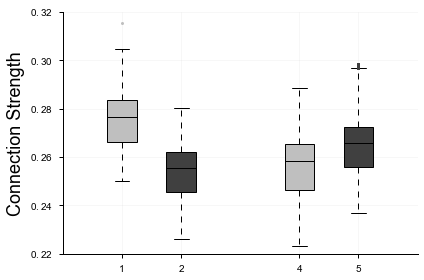

In [5]:
%matplotlib inline

fac_coef_pop = []
fac_subgraph_pop = []
n_null = 100

n_subj = len(subj_dict.keys())
for subj_i, subj in enumerate(subj_dict.iterkeys()):
    print(" -- Processing: {}".format(subj))
    
    data_sub = np.load(subj_dict[subj]['subgraph_path'], mmap_mode='r')
    data_mod = np.load(subj_dict[subj]['module_path'], mmap_mode='r')
    
    module_assign = data_mod['module_assign']
    fac_subgraph = data_sub['fac_subnet']
    fac_subgraph_pop.append(fac_subgraph)    
    fac_coef = data_sub['fac_coef']
    fac_coef_pop.append(fac_coef)
        
    n_win = module_assign.shape[0]
    n_node = module_assign.shape[1]
    n_fac = fac_subgraph.shape[0]
    n_conn = fac_subgraph.shape[1]
    
    if subj_i == 0:
        intra_module_conn_pop = np.nan*np.zeros((n_subj, n_fac, n_win))
        inter_module_conn_pop = np.nan*np.zeros((n_subj, n_fac, n_win))
        intra_module_conn_pop_null = np.nan*np.zeros((n_subj, n_null, n_fac, n_win))
        inter_module_conn_pop_null = np.nan*np.zeros((n_subj, n_null, n_fac, n_win))

    
    # Real Intra/Inter Module Subgraph Connectivity
    intra_module_conn = []
    inter_module_conn = []
    for ii in xrange(n_fac):
        norm_subgraph = fac_subgraph[ii, :] / fac_subgraph[ii, :].max()
        subgraph_adj = Codebase.Networks.configuration.convert_conn_vec_to_adj_matr(norm_subgraph)
        
        for iw in xrange(n_win):
            module_id = np.unique(module_assign[iw, :])
            
            if len(module_id) == 1:
                intra_module_conn_pop[subj_i, ii, iw] = 0
                inter_module_conn_pop[subj_i, ii, iw] = 0
            else:            
                for m_id in module_id:
                    in_nodes = np.flatnonzero(module_assign[iw, :] == m_id)
                    out_nodes = np.setdiff1d(np.arange(n_node), in_nodes)

                    in_1, in_2 = np.meshgrid(in_nodes, in_nodes)
                    intra_module_conn.append(np.mean(subgraph_adj[in_1, in_2]))

                    in_1, out_2 = np.meshgrid(in_nodes, out_nodes)                
                    inter_module_conn.append(np.mean(subgraph_adj[in_1, out_2]))
                intra_module_conn_pop[subj_i, ii, iw] = np.mean(intra_module_conn)
                inter_module_conn_pop[subj_i, ii, iw] = np.mean(inter_module_conn)            
    
    # Null Intra/Inter Module Connectivity
    for nn in xrange(n_null):
        intra_module_conn = []
        inter_module_conn = [] 
        for ii in xrange(n_fac):            
            norm_subgraph = fac_subgraph[ii, :] / fac_subgraph[ii, :].max()
            subgraph_adj = Codebase.Networks.configuration.convert_conn_vec_to_adj_matr(norm_subgraph)

            for iw in xrange(n_win):
                null_module_assign = np.random.permutation(module_assign[iw, :])
                module_id = np.unique(null_module_assign)         
            
                if len(module_id) == 1:
                    intra_module_conn_pop_null[subj_i, nn, ii, iw] = 0
                    inter_module_conn_pop_null[subj_i, nn, ii, iw] = 0
                else:            
                    for m_id in module_id:
                        in_nodes = np.flatnonzero(null_module_assign == m_id)
                        out_nodes = np.setdiff1d(np.arange(n_node), in_nodes)

                        in_1, in_2 = np.meshgrid(in_nodes, in_nodes)
                        intra_module_conn.append(np.mean(subgraph_adj[in_1, in_2]))

                        in_1, out_2 = np.meshgrid(in_nodes, out_nodes)
                        inter_module_conn.append(np.mean(subgraph_adj[in_1, out_2]))
                    intra_module_conn_pop_null[subj_i, nn, ii, iw] = np.mean(intra_module_conn)
                    inter_module_conn_pop_null[subj_i, nn, ii, iw] = np.mean(inter_module_conn)      

intra_module_conn_subj = np.nanmean(np.nanmean(intra_module_conn_pop, axis=-1), axis=-1)
inter_module_conn_subj = np.nanmean(np.nanmean(inter_module_conn_pop, axis=-1), axis=-1)
intra_module_conn_subj_null = np.nanmean(np.nanmean(intra_module_conn_pop_null, axis=-1), axis=-1).reshape(-1)
inter_module_conn_subj_null = np.nanmean(np.nanmean(inter_module_conn_pop_null, axis=-1), axis=-1).reshape(-1)
                    
cases_list = [('Intra-Module Subgraph Connectivity', intra_module_conn_subj),
              ('Intra-Module Null Subgraph Connectivity', intra_module_conn_subj_null),
              ('Inter-Module Subgraph Connectivity', inter_module_conn_subj),
              ('Inter-Module Null Subgraph Connectivity', inter_module_conn_subj_null)]

pairs = [[cases_list[0], cases_list[1]],
         [cases_list[0], cases_list[2]],
         [cases_list[2], cases_list[3]],
         [cases_list[1], cases_list[3]]]

for p_i, pair in enumerate(pairs):
    t, p = stats.ttest_ind(pair[0][1], pair[1][1])    
    print('{} - {}: {}, {}'.format(pair[0][0], pair[1][0], t, p))


# Construct result figure
plt.figure()
ax = plt.subplot(111)
bplot = ax.boxplot([cases_list[0][1], cases_list[1][1],
                    cases_list[2][1], cases_list[3][1]],
                   positions=[1, 2, 4, 5], patch_artist=True)
fig_plotting.set_box_color(bplot, 'k', [[0.75, 0.75, 0.75],
                                        [0.25, 0.25, 0.25],
                                        [0.75, 0.75, 0.75],
                                        [0.25, 0.25, 0.25]])
ax.set_xlim([0, 6])

# Axis Settings
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel('Connection Strength')

plt.savefig('./e04-Figures/IntraInter_SubgraphModule_Conn.svg'.format(p_i+1))
plt.show()
plt.close()      

## Generate the Module-Sensitivity Index

RanksumsResult(statistic=29.467597756102347, pvalue=7.4922042477791755e-191)


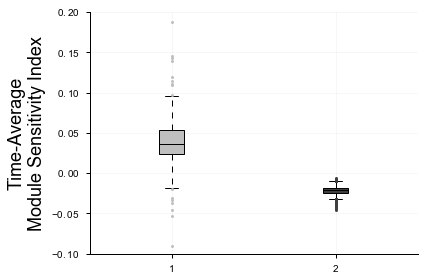

In [6]:
# Dimensions: (n_subj, n_fac, n_win)
module_sensitivity_pop = (intra_module_conn_pop - inter_module_conn_pop) / \
                         (intra_module_conn_pop + inter_module_conn_pop)
# Dimensions: (n_subj, n_null, n_fac, n_win)    
module_sensitivity_pop_null = (intra_module_conn_pop_null - inter_module_conn_pop_null) / \
                              (intra_module_conn_pop_null + inter_module_conn_pop_null)
n_subj, n_null, n_fac, n_win = module_sensitivity_pop_null.shape    

# Compute subgraph/time average measure
module_sensitivity_pop_flat = np.nanmean(module_sensitivity_pop, axis=-1).reshape(-1)
module_sensitivity_pop_null_flat = np.nanmean(module_sensitivity_pop_null, axis=-1).reshape(-1)

print(stats.ranksums(module_sensitivity_pop_flat, module_sensitivity_pop_null_flat))

# Construct result figure
plt.figure()
ax = plt.subplot(111)
bplot = ax.boxplot([module_sensitivity_pop_flat,
                    module_sensitivity_pop_null_flat],
                   positions=[1, 2], patch_artist=True)
fig_plotting.set_box_color(bplot, 'k', [[0.75, 0.75, 0.75],
                                        [0.25, 0.25, 0.25]])

# Axis Settings
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel('Time-Average\nModule Sensitivity Index')

plt.savefig('./e04-Figures/Module_Sensitivity_Index.svg')                           
plt.show()
plt.close()      

## Temporal Expression of Module-Sensitive Subgraphs

1-RanksumsResult(statistic=-7.373505709115256, pvalue=1.6619856730270186e-13)
2-RanksumsResult(statistic=-6.8360388649196357, pvalue=8.1412865376028422e-12)
3-RanksumsResult(statistic=-5.9633776447740585, pvalue=2.4707648285389902e-09)
4-RanksumsResult(statistic=-5.3800623744427547, pvalue=7.4460035297714479e-08)
5-RanksumsResult(statistic=-3.9838044222098312, pvalue=6.7820695150773151e-05)
6-RanksumsResult(statistic=-3.215554323768206, pvalue=0.0013019285083056044)
7-RanksumsResult(statistic=-1.5611581739646263, pvalue=0.11848643494408505)
8-RanksumsResult(statistic=-0.35754066767995391, pvalue=0.72068708697291273)
9-RanksumsResult(statistic=1.0302411049312465, pvalue=0.30289683833841874)
10-RanksumsResult(statistic=2.1205860289983471, pvalue=0.033956654862471791)
11-RanksumsResult(statistic=3.6197139793676367, pvalue=0.00029492883598516073)
12-RanksumsResult(statistic=5.009036875546423, pvalue=5.4703092355689818e-07)
13-RanksumsResult(statistic=5.4513393394436074, pvalue=4.9991873384

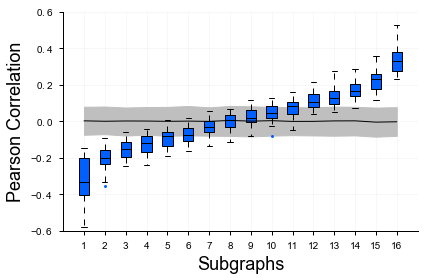

In [7]:
module_sensitivity_coef = np.zeros((n_subj, n_fac))
module_sensitivity_coef_null = np.zeros((n_subj, n_null, n_fac))

for subj_i in xrange(n_subj):
    for fac_i in xrange(n_fac):
        norm_coef = fac_coef_pop[subj_i][fac_i, :] / fac_coef_pop[subj_i][fac_i, :].max()
        good_tw = np.flatnonzero(~np.isnan(module_sensitivity_pop[subj_i, fac_i, :]))
        rho, pv = stats.pearsonr(module_sensitivity_pop[subj_i, fac_i, good_tw], norm_coef[good_tw])
        if np.isnan(rho):
            continue
        module_sensitivity_coef[subj_i, fac_i] = rho
        
        for null_i in xrange(n_null):
            null_coef = np.random.permutation(norm_coef)
            rho, pv = stats.pearsonr(module_sensitivity_pop[subj_i, fac_i, good_tw], null_coef[good_tw])
            if np.isnan(rho):
                continue
            module_sensitivity_coef_null[subj_i, null_i, fac_i] = rho
        
module_sensitivity_coef_sorted = np.sort(module_sensitivity_coef, axis=1)
module_sensitivity_coef_null_sorted = np.sort(module_sensitivity_coef_null, axis=1).reshape(n_subj*n_null, n_fac)
module_sensitivity_coef_ord = np.argsort(module_sensitivity_coef, axis=1)

# Plot Correlation Between Module-Sensitivity Index and Normalized Temporal Coefficient
plt.figure()
ax = plt.subplot(111)

ax.plot(np.arange(1, 17),
        np.percentile(module_sensitivity_coef_null_sorted, 50, axis=0),
        color='k', linewidth=1.0)
ax.fill_between(np.arange(1, 17),
                y1=np.percentile(module_sensitivity_coef_null_sorted, 25, axis=0),
                y2=np.percentile(module_sensitivity_coef_null_sorted, 75, axis=0),
                color=[0.75, 0.75, 0.75])

for ii in xrange(n_fac):
    print('{}-{}'.format(ii+1, stats.ranksums(module_sensitivity_coef_sorted[:, ii],
                                              module_sensitivity_coef_null_sorted[:, ii])))

clr_list = []
for ii in xrange(n_fac):
    clr_list.append([0.0, 0.375, 1.0])
bplot = ax.boxplot(module_sensitivity_coef_sorted, patch_artist=True);
fig_plotting.set_box_color(bplot, 'k', clr_list)

# Axis Settings
ax.set_xlim([0, 17])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel('Pearson Correlation');
ax.set_xlabel('Subgraphs');

plt.savefig('./e04-Figures/Module_Sensitivity_Index-TemporalPCorr.svg')
plt.show()
plt.close()              

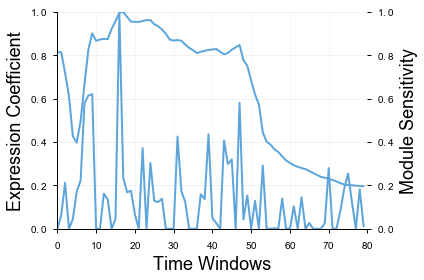

In [74]:
s_id = 2
opt_fac = module_sensitivity_coef_ord[s_id,:][-1]

### Plot Example Good and Bad Module sensitivity
plt.figure()
ax = plt.subplot(111)
ax.plot(fac_coef_pop[s_id][opt_fac, :] / fac_coef_pop[s_id][opt_fac, :].max())

# Axis Settings
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('Time Windows');
ax.set_ylabel('Expression Coefficient');

ax1 = ax.twinx()
ax1.plot(module_sensitivity_pop[s_id, opt_fac,:] / module_sensitivity_pop[s_id, opt_fac, :].max() )

# Axis Settings
ax1.yaxis.set_ticks_position('right')
ax1.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_ylabel('Module Sensitivity');

plt.savefig('./e04-Figures/{}-Subgraph_{}-Module_Sensitivity_Index-TemporalCoef.svg'.format(subj_dict.keys()[s_id],
                                                                                           opt_fac))
plt.show()
plt.close()              

### Relate Module-Reconfiguration to Subgraph-Reconfiguration

 -- Processing: h010615p
 -- Processing: j032315w
 -- Processing: A010615C
 -- Processing: b031615b
 -- Processing: a012615k
 -- Processing: d011215h
 -- Processing: a022315k
 -- Processing: b020315b
 -- Processing: k031615k
 -- Processing: m020915s
 -- Processing: s031015v
 -- Processing: n032315o
 -- Processing: H020915Z
 -- Processing: m011215c
 -- Processing: a020315s
 -- Processing: h022315k
 -- Processing: m030215g
 -- Processing: M030215R
 -- Processing: j030915h
 -- Processing: b012615o
0.0
0.043


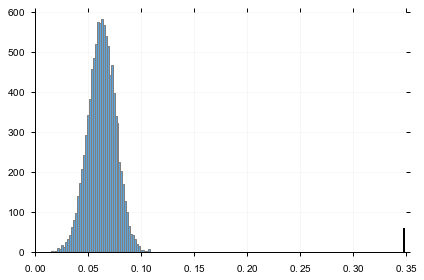

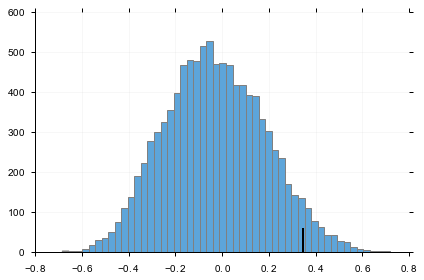

In [523]:
%matplotlib inline               

n_subj = len(subj_dict.keys())
n_null = 10000

mod_flex_pop = np.zeros(n_subj)
tmpr_flex_pop = np.zeros(n_subj)
mod_flex_pop_null = np.zeros((n_subj, n_null))
tmpr_flex_pop_null = np.zeros((n_subj, n_null))

for subj_i, subj in enumerate(subj_dict.iterkeys()):
    print(" -- Processing: {}".format(subj))
        
    data_cfg = np.load(subj_dict[subj]['cfg_path'], mmap_mode='r')
    data_sub = np.load(subj_dict[subj]['subgraph_path'], mmap_mode='r')
    data_mod = np.load(subj_dict[subj]['module_path'], mmap_mode='r')
    
    module_assign = data_mod['module_assign']
    cfg_matr = data_cfg['cfg_matr']
    fac_subgraph = data_sub['fac_subnet']
    fac_coef = data_sub['fac_coef']
        
    n_win = module_assign.shape[0]
    n_node = module_assign.shape[1]
    n_fac = fac_subgraph.shape[0]
    n_conn = fac_subgraph.shape[1]
    mods = np.unique(module_assign)
        
    # Module Membership
    rate_memb_change = []
    for tw in xrange(n_win-1):
        n_memb_change = []
        for mm in mods:
            cur_memb = np.flatnonzero(module_assign[tw, :] == mm)
            nex_memb = np.flatnonzero(module_assign[tw+1, :] == mm)
            del_memb = len(np.setdiff1d(nex_memb, cur_memb))
            n_memb_change.append(del_memb)
        rate_memb_change.append(np.mean(n_memb_change))
    mod_flex_pop[subj_i] = np.mean(rate_memb_change)
    
    
    # Module Membership Null
    for nn in xrange(n_null):
        module_assign_null = np.zeros((n_win, n_node))
        for tw in xrange(n_win):
            module_assign_null[tw, :] = np.random.permutation(module_assign[tw, :])            
        
        rate_memb_change = []
        for tw in xrange(n_win-1):
            n_memb_change = []
            for mm in mods:
                cur_memb = np.flatnonzero(module_assign_null[tw, :] == mm)
                nex_memb = np.flatnonzero(module_assign_null[tw+1, :] == mm)
                del_memb = len(np.setdiff1d(nex_memb, cur_memb))
                n_memb_change.append(del_memb)
            rate_memb_change.append(np.mean(n_memb_change))
        mod_flex_pop_null[subj_i, nn] = np.mean(rate_memb_change)  
        
    # Temporal expression flexibility
    fac_coef_norm = fac_coef / fac_coef.max()
    metr = np.mean(np.abs(np.diff(np.max(fac_coef_norm, axis=0))))
    tmpr_flex_pop[subj_i] = metr

    # Temporal expression flexibility null
    for nn in xrange(n_null):
        fac_coef_norm_null = np.random.permutation(fac_coef.reshape(-1)).reshape(n_fac, n_win)[0]
        fac_coef_norm_null /= fac_coef_norm_null.max()
        metr = np.mean(np.abs(np.diff(fac_coef_norm_null)))
        tmpr_flex_pop_null[subj_i, nn] = metr
    
# Bootstrap
rho_mod_flex_null = np.zeros(n_null)
rho_tmpr_flex_null = np.zeros(n_null)
for nn in range(n_null):
    # Real Temporal Flex, Null Module Flex
    rho, _ = stats.pearsonr(tmpr_flex_pop, mod_flex_pop_null[:, nn])
    rho_mod_flex_null[nn] = rho

    # Real Module Flex, Null Temporal Flex
    rho, _ = stats.pearsonr(mod_flex_pop, tmpr_flex_pop_null[:, nn])
    rho_tmpr_flex_null[nn] = rho

true_rho, _ = stats.pearsonr(mod_flex_pop, tmpr_flex_pop)

plt.figure(); 
ax = plt.subplot(111);
ax.hist(rho_mod_flex_null, 50);
ax.vlines(true_rho, 0, 60);
print(np.mean(rho_mod_flex_null > true_rho))

plt.figure(); 
ax = plt.subplot(111);
ax.hist(rho_tmpr_flex_null, 50);
ax.vlines(true_rho, 0, 60);
print(np.mean(rho_tmpr_flex_null > true_rho))

## Subgraph Topography

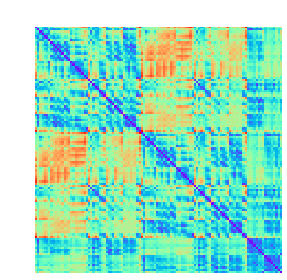

In [27]:
# Generate Node Distance Matrix
df = pd.read_csv('{}/Atlas/HOA112_Labels.csv'.format(path_CoreData))
n_node = len(df)

dist_matr = np.zeros((n_node, n_node))
ix, iy = np.mgrid[:n_node, :n_node]

dX = np.array(df.X)
dY = np.array(df.Y)
dZ = np.array(df.Z)

dist_matr[ix, iy] = np.sqrt((dX[ix]-dX[iy])**2 + 
                            (dY[ix]-dY[iy])**2 +
                            (dZ[ix]-dZ[iy])**2)
dist_matr /= dist_matr.max()

plt.figure()        
ax = plt.subplot(111)
mat = ax.matshow(dist_matr, cmap='rainbow')
#plt.colorbar(mat, ax=ax)

# Axis Settings
ax.set_axis_off()
#ax.set_title('Inter-Region Distance')

plt.savefig('./e04-Figures/Topography-InterRegion_Distance.svg')
plt.show()
plt.close()          

### Relate Subgraph Connection Strength to Connection Distance

In [16]:
%matplotlib inline
n_null = 1000

n_subj = len(subj_dict.keys())
for subj_i, subj in enumerate(subj_dict.iterkeys()):
    print(" -- Processing: {}".format(subj))
    
    data_sub = np.load(subj_dict[subj]['subgraph_path'], mmap_mode='r')
    
    fac_subgraph = data_sub['fac_subnet']
    fac_coef = data_sub['fac_coef']
        
    n_win = module_assign.shape[0]
    n_node = module_assign.shape[1]
    n_fac = fac_subgraph.shape[0]
    n_conn = fac_subgraph.shape[1]

    triu_ix, triu_iy = np.triu_indices(n_node, k=1)
    conn_dist = dist_matr[triu_ix, triu_iy]    
    
    if subj_i == 0:
        topo_sens_pop = np.nan*np.zeros((n_subj, n_fac))
        topo_sens_pop_null = np.nan*np.zeros((n_subj, n_null, n_fac))        

    # Correlation between Subgraph and Distance Matrix
    for f_id in xrange(n_fac):
        fac_subgraph_norm = fac_subgraph[f_id, :] / fac_subgraph[f_id, :].max()
        rho, pval = stats.pearsonr(conn_dist, fac_subgraph_norm)
        topo_sens_pop[subj_i, f_id] = rho
    
    # Null Correlation between Subgraph and Distance Matrix
    for ns in xrange(n_null):
        for f_id in xrange(n_fac):
            fac_subgraph_norm = fac_subgraph[f_id, :] / fac_subgraph[f_id, :].max()        
            rho, pval = stats.pearsonr(conn_dist,
                                    np.random.permutation(fac_subgraph_norm))
            topo_sens_pop_null[subj_i, ns, f_id] = rho

 -- Processing: h010615p
 -- Processing: j032315w
 -- Processing: A010615C
 -- Processing: b031615b
 -- Processing: a012615k
 -- Processing: d011215h
 -- Processing: a022315k
 -- Processing: b020315b
 -- Processing: k031615k
 -- Processing: m020915s
 -- Processing: s031015v
 -- Processing: n032315o
 -- Processing: H020915Z
 -- Processing: m011215c
 -- Processing: a020315s
 -- Processing: h022315k
 -- Processing: m030215g
 -- Processing: M030215R
 -- Processing: j030915h
 -- Processing: b012615o


### Topographical Sensitivity

1-RanksumsResult(statistic=-7.7419032595748289, pvalue=9.7939500150038036e-15)
2-RanksumsResult(statistic=-7.7419032595748289, pvalue=9.7939500150038036e-15)
3-RanksumsResult(statistic=-7.7419032595748289, pvalue=9.7939500150038036e-15)
4-RanksumsResult(statistic=-7.7418645500585317, pvalue=9.7969330225584951e-15)
5-RanksumsResult(statistic=-7.7360581226138505, pvalue=1.0254659580855631e-14)
6-RanksumsResult(statistic=-7.7352452227715949, pvalue=1.0320398155707836e-14)
7-RanksumsResult(statistic=-7.7224710823932963, pvalue=1.1409581019290404e-14)
8-RanksumsResult(statistic=-7.5374783040057558, pvalue=4.7914631936360843e-14)
9-RanksumsResult(statistic=-5.9727235266967895, pvalue=2.3332512890743743e-09)
10-RanksumsResult(statistic=-2.9094846639808165, pvalue=0.0036202514797045613)
11-RanksumsResult(statistic=-0.33835988195971789, pvalue=0.73509200260115337)
12-RanksumsResult(statistic=3.6625395940396603, pvalue=0.00024972713864556306)
13-RanksumsResult(statistic=7.2145635190488893, pvalu

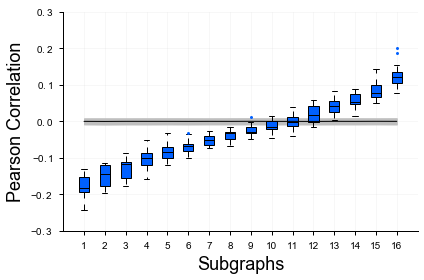

In [17]:
topo_sens_pop_sorted = np.sort(topo_sens_pop, axis=1)
topo_sens_pop_null_sorted = np.sort(topo_sens_pop_null, axis=1).reshape(n_subj*n_null, n_fac)
topo_sens_pop_ord = np.argsort(topo_sens_pop, axis=1)

for ii in xrange(n_fac):
    print('{}-{}'.format(ii+1, stats.ranksums(topo_sens_pop_sorted[:, ii],
                                              topo_sens_pop_null_sorted[:, ii])))

# Plot Topographical Sensitivity
plt.figure()
ax = plt.subplot(111)

ax.plot(np.arange(1, n_fac+1),
        np.percentile(topo_sens_pop_null_sorted, 50, axis=0),
        color='k', linewidth=1.0)
ax.fill_between(np.arange(1, 17),
                y1=np.percentile(topo_sens_pop_null_sorted, 25, axis=0),
                y2=np.percentile(topo_sens_pop_null_sorted, 75, axis=0),
                color=[0.75, 0.75, 0.75])

clr_list = []
for ii in xrange(n_fac):
    clr_list.append([0.0, 0.375, 1.0])
bplot = ax.boxplot(topo_sens_pop_sorted, patch_artist=True);
fig_plotting.set_box_color(bplot, 'k', clr_list)

# Axis Settings
ax.set_xlim([0, 17])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel('Pearson Correlation');
ax.set_xlabel('Subgraphs');

plt.savefig('./e04-Figures/Topographic_Sensitivity-SubgraphPCorr.svg')
plt.show()
plt.close()              

### Compute Subgraph Dynamics

In [77]:
tmpr_enrg_pop = np.zeros((n_subj, n_fac))
tmpr_flex_pop = np.zeros((n_subj, n_fac))
tmpr_skew_pop = np.zeros((n_subj, n_fac))

for subj_i in xrange(n_subj):
    for ii, fac_i in enumerate(topo_sens_pop_ord[subj_i, :]):
        fac_subgraph_norm = fac_subgraph_pop[subj_i][fac_i, :] / fac_subgraph_pop[subj_i][fac_i, :].max()
        fac_coef_norm = fac_coef_pop[subj_i][fac_i, :] / fac_coef_pop[subj_i][fac_i, :].max()
                        
        # Temporal energy
        tmpr_enrg = np.mean(fac_coef_norm ** 2)
        tmpr_enrg_pop[subj_i, ii] = tmpr_enrg
        
        # Temporal flexibility
        tmpr_flex = np.mean(np.abs(np.diff(fac_coef_norm)))
        tmpr_flex_pop[subj_i, ii] = tmpr_flex
        
        # Temporal skew
        tmpr_skew = stats.skew(fac_coef_norm)
        tmpr_skew_pop[subj_i, ii] = tmpr_skew        

### Relate Subgraph Dynamics to Topographical Sensitivity

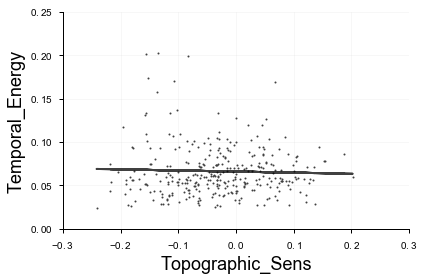

('Topographic_Sens', 'Temporal_Energy', -0.03703843839626849, 0.50912709928128574)


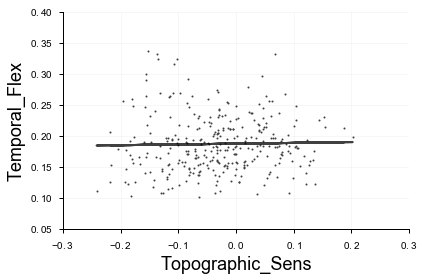

('Topographic_Sens', 'Temporal_Flex', 0.023352650738852915, 0.67728786337717484)


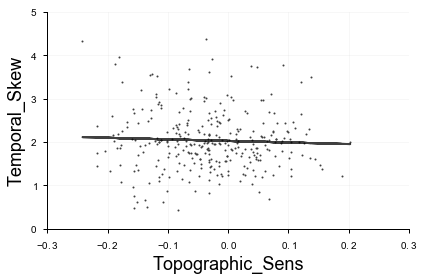

('Topographic_Sens', 'Temporal_Skew', -0.045542495577230911, 0.41683628442184639)


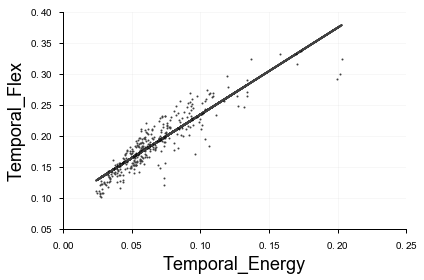

('Temporal_Energy', 'Temporal_Flex', 0.89871164175655838, 7.1678814030148932e-116)


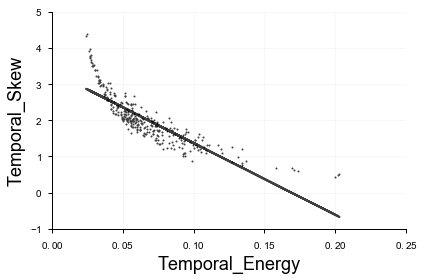

('Temporal_Energy', 'Temporal_Skew', -0.84667579066405896, 3.8936280259803714e-89)


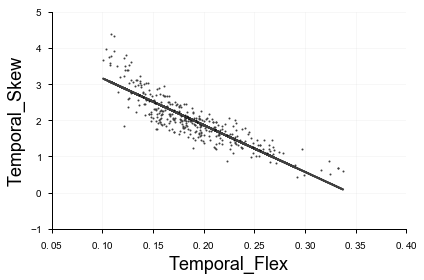

('Temporal_Flex', 'Temporal_Skew', -0.86271640771777691, 3.5379081648461352e-96)


In [78]:
topo_props = [('Topographic_Sens',   topo_sens_pop_sorted),
              ('Temporal_Energy',    tmpr_enrg_pop),
              ('Temporal_Flex',      tmpr_flex_pop),
              ('Temporal_Skew',      tmpr_skew_pop)]

pairs = []
for topo_1 in topo_props:
    for topo_2 in topo_props:
        
        if (topo_2, topo_1) in pairs:
            continue
            
        if topo_1 == topo_2:
            continue
        
        plt.figure()        
        ax = plt.subplot(111)
                
        ax.scatter(topo_1[1], topo_2[1], color=[0.25, 0.25, 0.25], s=1.0)
        m, b, rho, pval, stderr = stats.linregress(topo_1[1].reshape(-1), topo_2[1].reshape(-1))
        ax.plot(topo_1[1].reshape(-1), m*topo_1[1].reshape(-1)+b, color='k', alpha=0.75)
                
        # Axis Settings
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_xlabel(topo_1[0]);
        ax.set_ylabel(topo_2[0]);

        plt.savefig('./e04-Figures/{}-{}.svg'.format(topo_1[0], topo_2[0]))
        plt.show()
        plt.close()          
        
        print(topo_1[0], topo_2[0], rho, pval)
        
        pairs.append((topo_1, topo_2))